In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [3]:
def plot_2D(data, target, target_names):
	colors = cycle('rgbcmykw')
	target_ids = range(len(target_names))
	plt.figure()
	for i, c, label in zip(target_ids, colors, target_names):
		plt.scatter(data[target == i, 0], data[target == i, 1],c=c, label=label)
	plt.legend()
	plt.show()


In [4]:
#using BIC for choosing clusters
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=3,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

predY = best_gmm.predict(X)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.
  2.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


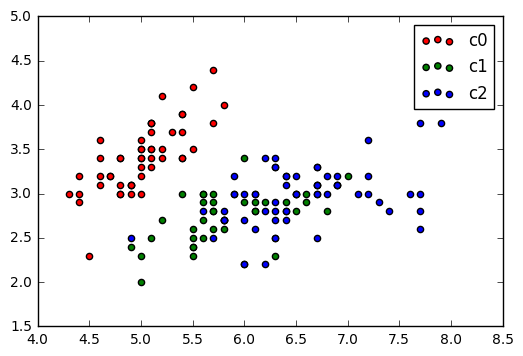

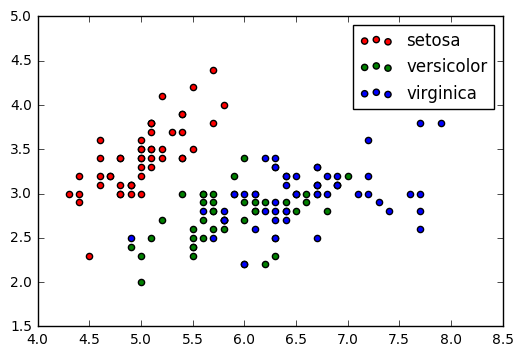

In [15]:
print predY
print Y


plot_2D(X, predY, ["c0", "c1", "c2"])
plot_2D(X, iris.target, iris.target_names)

# Discussion

For GMM we used BIC to find the number of clusters. Here also BIC gave number of clusters to be 2. So, we decided to use 3 and see the results, which is quite good as shown above. We have however used the bic score to find the best mixture type.